
<a name="T_4A984F51"></a>

# <span style="color:rgb(213,80,0)">Part II: **The DFN Model overview**</span>

 **Dr. Sridevi Krishnamurthi** and **Dr. Simon Clark,** *SINTEF AS, Battery Technology, Trondheim, Norway*


This guide provides an introductory resource for readers who would like to learn about lithium\-ion batteries, battery modelling, or both! Starting from the basics of how a Li\-ion battery works, we go step\-by\-step, introducing new modelling concepts at each level. After completing this guide, readers should have a working knowledge of Li\-ion battery design principles and be able to simulate a variety of designs under different conditions.

-   **In Part I : Introduction to Battery Modelling with BattMo** of the modeling guide **,** we provided an overview of battery modeling, introduced key terms, and explained how to use BattMo.
-   **In Part II:The DFN Model overview,** we will delve into the DFN model in detail, the model employs physical, chemical, and electrochemical parameters to describe the behavior of the electrodes and electrolytes, We will study these parameters, each of which impacts the cell's capacity and performance.

*Please run 'startupBattMo.M' present in the home folder before running this notebook, this loads all the neccessary modules for running the simulations.*

<a name="beginToc"></a>

## Part II: Table of Contents
[1. DFN Model Overview](#H_62620F23)

&emsp;[3. Thermodynamic parameters](#H_705384BC)

&emsp;&emsp;[Example 3. Temperature](#H_2AFE1D51)

&emsp;&emsp;[Example 4. Saturation concentration of the material](#H_5AD83574)

&emsp;[4. Kinetic parameters](#H_8A2961C9)

&emsp;[5. Transport parameters](#H_70666AB5)

&emsp;&emsp;[Example 7. Reference diffusion coefficient (Solid diffusion)](#H_B7317C64)

&emsp;&emsp;[Example 11. Bruggeman coefficient in the electrolyte (effective ionic conductivity)](#H_650E4330)

<a name="endToc"></a>
<a name="H_62620F23"></a>

## 1. DFN Model Overview

Physics based battery modeling encompasses various levels of complexity, ranging from microscale models that detail individual electrode particles to single\-particle models (SPM) that approximate the entire electrode as a single homogeneous particle.


The Doyle\-Fuller\-Newman (DFN) model also called pseudo\-two\-dimensional (P2D) lies between these two approaches. While it lacks the fine spatial resolution of microscale models, which describe the three\-dimensional microstructure, the DFN model assumes spherical symmetry for the active particles and characterizes the microstructure using a few key parameters, significantly reducing computational demands.


For a detailed overview of the different models, please refer [here](https://iopscience.iop.org/article/10.1088/2516-1083/ac7d31/meta).


Let us look at the model equations,

<p style="text-align:left">
   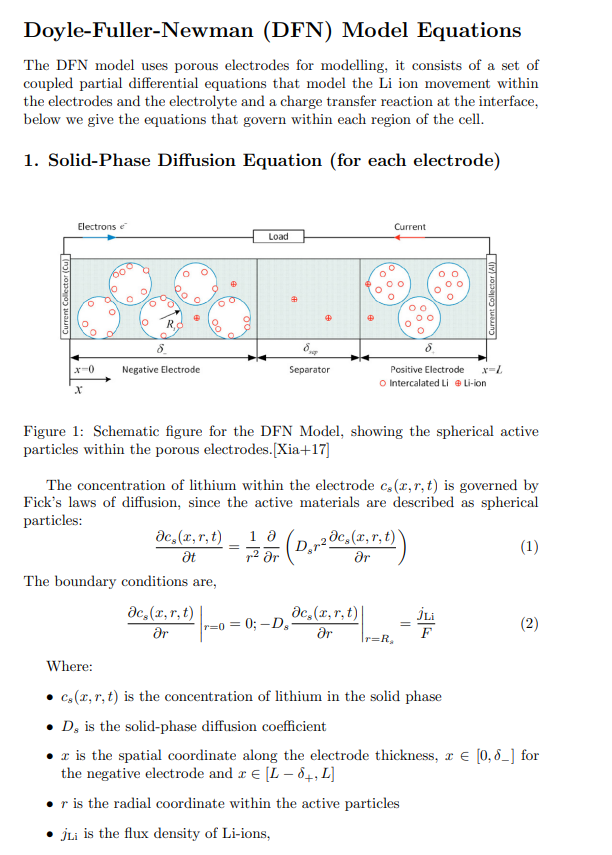
</p>


<p style="text-align:left">
   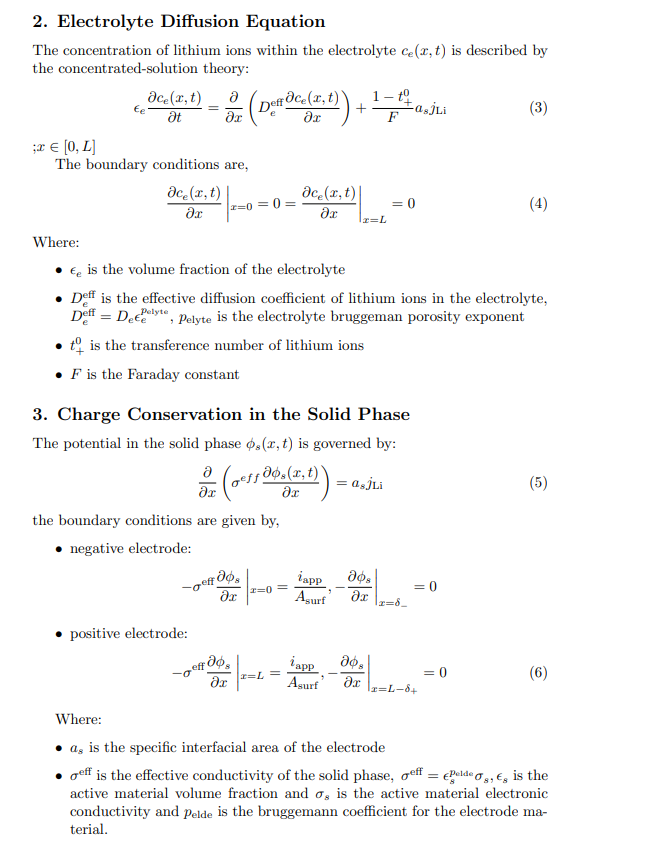
</p>


<p style="text-align:left">
   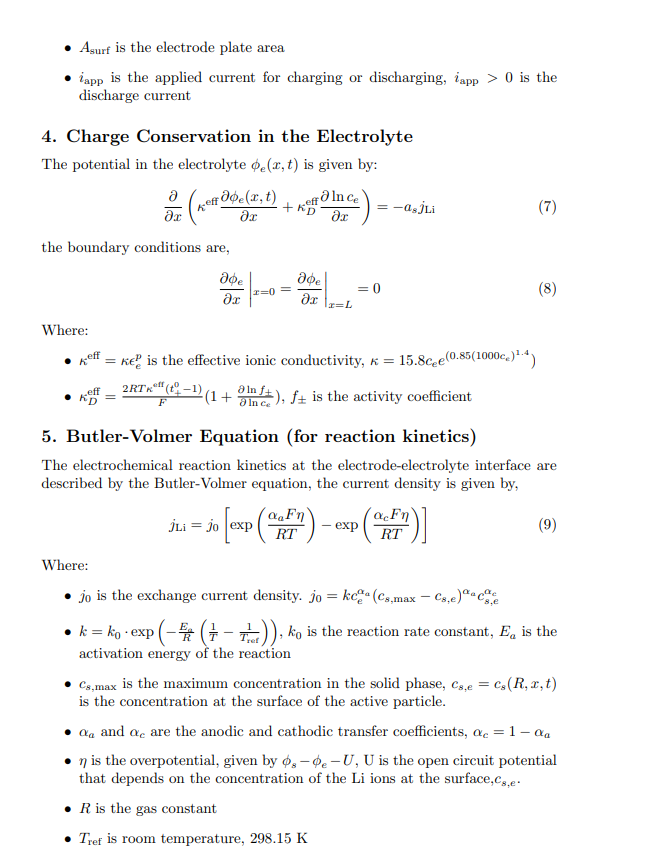
</p>


<p style="text-align:left">
   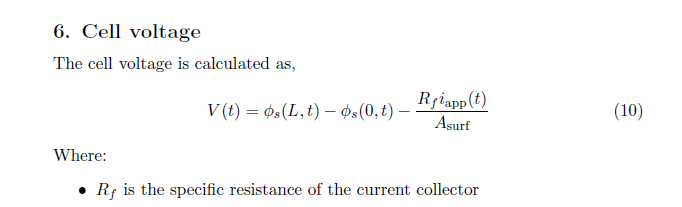
</p>


The PDEs are discretized in both the spatial,meaning the electrode and electrolyte regions are divided into discrete points and temporal domains. **BattMo uses finite volume method** to achieve this discretization. This process converts the PDEs into a set of non\-linear algebraic equations, which are then solved using numerical methods such as Newton\-Raphson or direct solvers.

<a name="H_31074F06"></a>

## **2. Overpotentials and Voltage losses**

The cell potential observed during operation differs from the thermodynamic potential, known as the Open Circuit Voltage (OCV), due to various losses that occur when a current is flowing. The additional voltage required to drive the charging and discharging at a given current is called the cell overpotential or overvoltage. This overvoltage arises from several factors, including ohmic losses, kinetic limitations, and transport limitations, each contributing to the overall voltage drop observed during cell operation, see **Figure 2** .

<p style="text-align:left">
   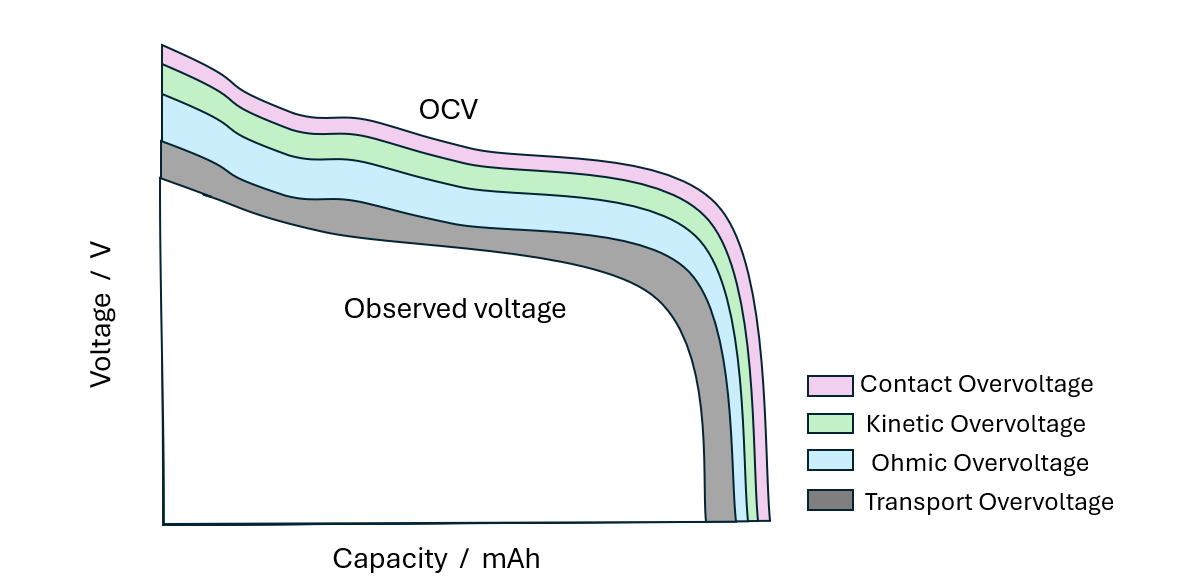
</p>


 **Figure 2: Schematic breakdown of overpotentials in a lithium\-ion battery (LIB) cell.**

<a name="H_95A52C58"></a>

 **a. Kinetic**


The Butler\-Volmer equation describes the kinetics of the charge transfer reaction at the electrode/electrolyte interface and the associated overpotential, as shown in the model equations. The rate of the reaction depends on the exchange current density, which is influenced by reaction rate constants, charge transfer coefficients that describe the asymmetry between the forward and backward reactions, and the charge transfer activation energy. These factors collectively determine how efficiently the electrochemical reaction proceeds and how the overpotential varies with current.

<a name="H_25B06175"></a>

**b. Transport**


Transport limitations, or mass transport limitations, occur due to inefficient diffusion processes, creating resistance to the movement of ions within the electrolyte or electrode materials. Key parameters influencing these limitations include diffusion coefficients and the initial concentrations of reactants. These limitations arise when the delivery rate of reactants to the reaction sites is slower than the rate at which they are consumed by the electrochemical reactions. This resistance to mass transport can lead to the formation of concentration gradients, increased overpotential, and ultimately reduced performance of the cell.

<a name="H_4DFCA5AB"></a>

 **c. Ohmic and contact**


Ohmic losses occur due to the electronic resistance within the electrodes, the ionic resistance in the electrolyte, and the interfacial resistance between the electrode and the current collectors. The ionic and electronic conductivities significantly influence the overall impedance of the system. These losses contribute to the overall voltage drop and are affected by the C\-rate and the temperature of operation.


A large overpotential is detrimental to the operation of the cell, leading to significant energy losses. Therefore, understanding the processes that cause these overpotentials is crucial for optimizing cell performance and efficiency.


In this tutorial, we will vary the different parameters that contribute to each of these overpotentials. By adjusting variables such as reaction rate constants, charge transfer coefficients, and material parameters such as particle radius and electronic conductivities, we will observe how these changes influence the overpotential and capacities, providing insights into the underlying mechanisms governing electrochemical behavior.

<a name="H_2F37139A"></a>

#### **Example 1. OCV curve and voltage loss at different C\-rates**

Thermodynamics determines the open\-circuit voltage (OCV) of a cell, which is defined as the difference between the OCVs of the positive and negative electrodes. The thermodynamic or equilibrium potential is influenced by factors such as the chemical nature of the species involved, their concentrations, the State of Charge (SOC), and temperature. While the Nernst equation can theoretically describe the equilibrium potential, the Gibbs free energy of the cell varies continuously with the state of lithiation in both the cathode and anode as the SOC changes, therefore experimental techniques like electrochemical impedance spectroscopy (EIS), Galvanostatic Intermittent Titration Technique (GITT) are often required to accurately measure the OCV.


To simulate the OCV in BattMo, one can use a very small C\-rate (0.1C). However, as the charging or discharging rate (C\-rate) increases, the cell experiences pronounced capacity and voltage losses. These losses arise because the kinetic (activation polarization) and transport (concentration polarization) overpotentials increase nonlinearly with the C\-rate, as discussed earlier.


 To illustrate this behavior, we discharge our NMC\-graphite cell at C\-rates ranging from 0.05C to 3C and observe that the potential drop becomes significant with higher rates. At the highest rate of 3C, the cell capacity shows the most substantial drop.


The **`plot_capacities`** function processes the parameter array and parameter name, discharging the cell at a constant current (CC) to generate the corresponding voltage vs. capacity plots.



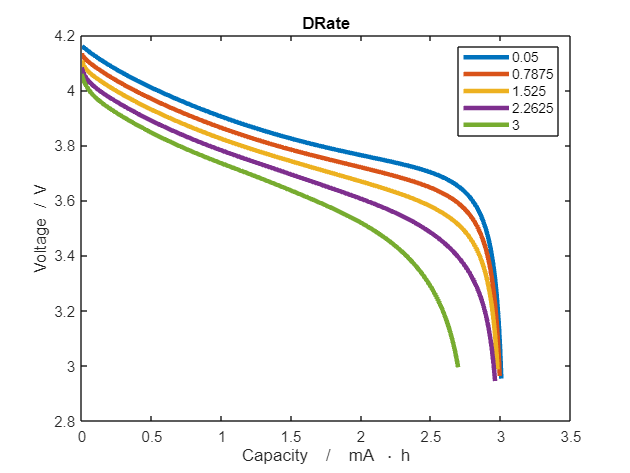


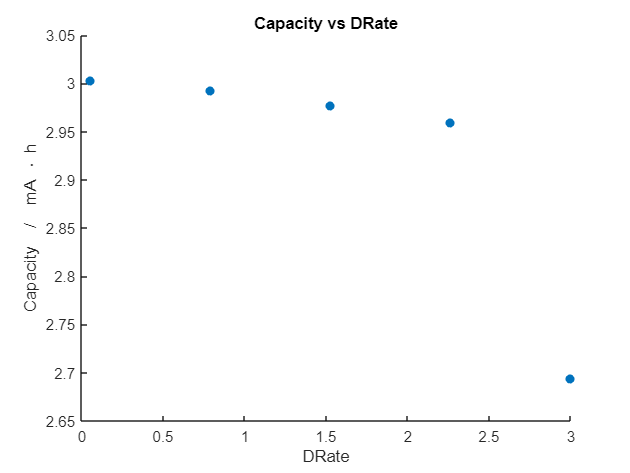

In [1]:
crate_array=[linspace(0.05,3,5)];
crate="Control.DRate";
plot_capacities(crate_array,crate)

<a name="H_705384BC"></a>

### 3. Thermodynamic parameters

We will now examine the key parameters that influence the Open Circuit Voltage of a cell.

<a name="H_82DCC783"></a>

#### **Example 2. Mass** fraction of active material and binder in electrode

To understand the effect of Li concentration on the OCV, we begin by selecting a very small C\-rate of 0.05C and explore how increasing the amount of the lithium content, impacts the cell's potential. This is achieved by increasing the mass fraction of the active material while simultaneously reducing the binder content. While we observe that increasing the mass fraction of active material results in higher capacity due to the greater availability of electrochemically active species, reducing the binder content excessively can lead to structural instabilities within the cell. Therefore, it is crucial to maintain an optimal ratio of binder to active material to prevent structural instability.


In [2]:
electrode_mf="PositiveElectrode.";
Crate_mf=0.05;
ele_mf=[linspace(0.90,0.96,3)];
negative_binder_mf=0.97-ele_mf;
positive_binder_mf=0.975-ele_mf;
markers= {'-',"-",'-','-','-','-','-'};
output = cell(size(ele_mf));
therm_parameter_1=strcat(electrode_mf,"Coating.ActiveMaterial.massFraction");
therm_parameter_2=strcat(electrode_mf,"Coating.Binder.massFraction");
jsonstruct_default = parseBattmoJson('Examples/JsonDataFiles/sample_input.json');
cccv_control_protocol = parseBattmoJson('cccv_control_charge.json');%loads the CCCV protocol
jsonstruct_modified = mergeJsonStructs({cccv_control_protocol, jsonstruct_default});

mergeJsonStructs: Parameter Control.controlPolicy is assigned twice with different values. Value from first jsonstruct is used.
mergeJsonStructs: Parameter Control.upperCutoffVoltage is assigned twice with different values. Value from first jsonstruct is used.
mergeJsonStructs: Parameter Control.dIdtLimit is assigned twice with different values. Value from first jsonstruct is used.
mergeJsonStructs: Parameter Control.dEdtLimit is assigned twice with different values. Value from first jsonstruct is used.
mergeJsonStructs: Parameter SOC is assigned twice with different values. Value from first jsonstruct is used.


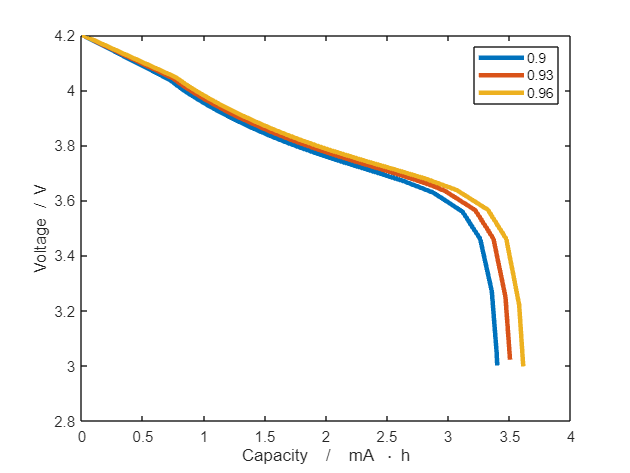

In [3]:
% instantiate an empty figure
figure()
% use a for-loop to iterate through the vector of mass fraction of active materials
for i = 1:numel(ele_mf)
        jsonstruct_modified.Control.CRate=Crate_mf;
        c1 = split(therm_parameter_1,'.');
        c2=  split(therm_parameter_2,'.');
        jsonstruct_modified = setfield(jsonstruct_modified,c1{:},ele_mf(i)); % active material massfraction
        if strcmp(c1{1}, 'PositiveElectrode')
            jsonstruct_modified = setfield(jsonstruct_modified,c2{:},positive_binder_mf(i));% binder massfraction
        else
            jsonstruct_modified = setfield(jsonstruct_modified,c2{:},negative_binder_mf(i)); % binder massfraction
        end
        jsonstruct_modified.TimeStepping.totalTime = (1./jsonstruct_modified.Control.CRate) .* 3600 .* 1.2;
        % Run the simulation and store the results in the output cell array
        [results,output{i}] = evalc("runBatteryJson(jsonstruct_modified)");
        % Retrieve the states from the simulation result
        states = output{i}.states;
        % Extract time and voltage quantities
        time = cellfun(@(state) state.time, states);
        voltage = cellfun(@(state) state.('Control').E, states);
        current = cellfun(@(state) state.('Control').I, states);
        % Calculate the capacity
        capacity = time .* current;
        if any(capacity>0)
        start_index_current_pos=find(current >= 0, 1);
        time_discharge=time(start_index_current_pos);
        discharge_capacity = (time-time_discharge) .* current;
        start_index = find(discharge_capacity == 0, 1);
        end_index = find(discharge_capacity > 0, 1,"last");
        plot(discharge_capacity(start_index:end_index)/(hour*milli),voltage(start_index:end_index), markers{i}, 'linewidth', 3)
        else
            plot(capacity/(hour*milli),voltage)
        end
        L{i} = strcat(num2str(ele_mf(i)));
        legend(L);
    hold on
end

hold off
xlabel('Capacity  /  mA \cdot h')
ylabel('Voltage  /  V')

<a name="H_2AFE1D51"></a>

#### Example 3. Temperature

We now examine the effect of temperature $T$ . For a C\-rate of 0.05C, across a temperature range from \-50°C to 50°C, there is little change in capacity or voltage profile. However, at a higher C\-rate, we observe an elevated voltage profile with increasing temperature, which could be attributed to kinetic and transport effects. These effects, which we will study further below, may explain the variations in performance under different temperature conditions and higher current loads.



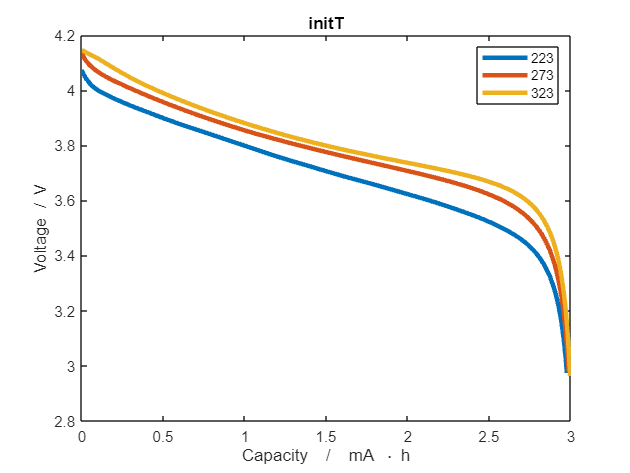


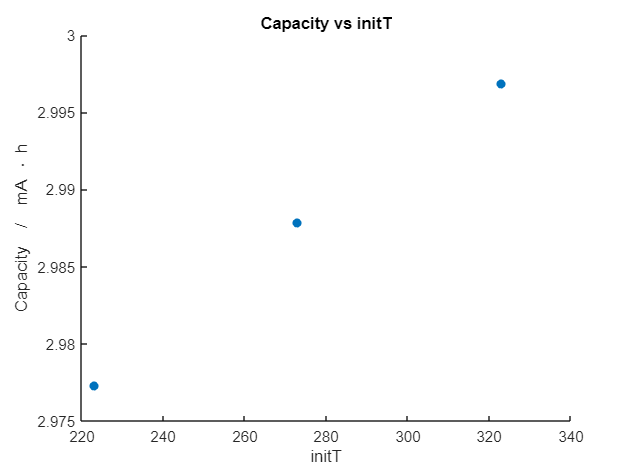

In [4]:
crate_temp=0.5;
therm_parameter_3="initT";
therm_parameter_3_vals=[linspace(223,323,3)];
plot_capacities(therm_parameter_3_vals,therm_parameter_3,crate_temp);

<a name="H_5AD83574"></a>

#### Example 4. Saturation concentration of the material

Another approach to increasing the concentration of lithium ions in the system is to raise the saturation concentration of lithium ions in the host material. This can lead to a notable increase in cell capacity, but only up to a certain limit, after which the capacity is constrained by the capacity of the other electrode. It is important to recognize that altering the saturation concentration inherently affects the intrinsic properties of the host material, which may impact the structural stability of the electrode. Furthermore, since the cell designer has no direct control over the saturation concentration of the host material, this is typically not a parameter that can be readily adjusted.



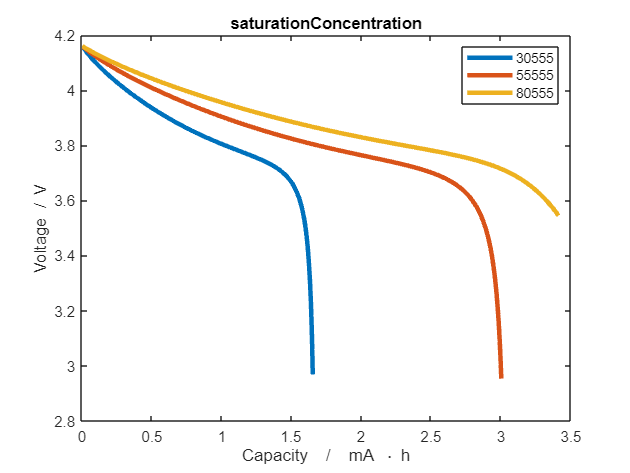


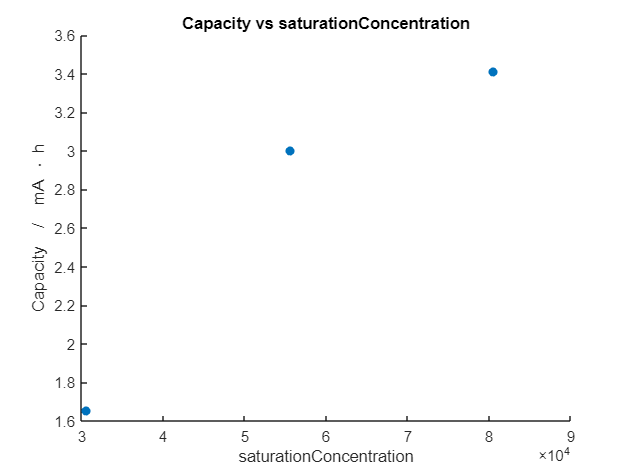

In [5]:
electrode_cmax="PositiveElectrode.";
Crate_cmax=0.05;
therm_parameter_3=strcat(electrode_cmax,"Coating.ActiveMaterial.Interface.saturationConcentration");
therm_parameter_3_vals=[linspace(30555,80555,3)];
plot_capacities(therm_parameter_3_vals,therm_parameter_3,Crate_cmax);

<a name="H_8A2961C9"></a>

### 4. Kinetic parameters

The charge transfer at the interface between the electrolyte and electrode is governed by the Butler\-Volmer equation,as presented in eqn (9). The equation describes the current (reaction rate) as a function of the overpotential and charge transfer co\-efficients at the interface. We will assume that mass transfer (transport) limitations are minimal, meaning that the movement of ions from the bulk solution to the electrode interface is faster than the rate at which they are consumed at the interface. This assumption allows us to focus on the reaction kinetics at the interface without being significantly influenced by concentration gradients or diffusion limitations in the electrolyte.

<a name="H_E8B00D69"></a>

####  **Example 5.** Charge transfer coefficient, anodic and cathodic at the surface of the active particles: Butler\-Volmer equation

Typically, the charge transfer coefficient, $\alpha_a ,$ is assumed to be 0.5, indicating a symmetric process where the forward and backward reaction rates (charge and discharge) are equally favorable. However, an asymmetric charge transfer can occur at the interface. The charge transfer coefficients play a crucial role in determining the slope of the current versus overpotential curve, thereby affecting the overall kinetics of the electrochemical reaction.


In the example below, we observe the behavior at the negative electrode during a charge\-discharge cycle as the charge transfer coefficient varies from 0.1 to 0.75. During charging, where the electrode undergoes reduction, increasing $\alpha$ increases the overpotential. However, during discharge, higher values of $\alpha$ actually decrease the overpotential. This behavior highlights the asymmetric impact of  the transfer coefficient on the electrode's performance during charging and discharging.


mergeJsonStructs: Parameter Control.controlPolicy is assigned twice with different values. Value from first jsonstruct is used.
mergeJsonStructs: Parameter Control.upperCutoffVoltage is assigned twice with different values. Value from first jsonstruct is used.
mergeJsonStructs: Parameter Control.dIdtLimit is assigned twice with different values. Value from first jsonstruct is used.
mergeJsonStructs: Parameter Control.dEdtLimit is assigned twice with different values. Value from first jsonstruct is used.
mergeJsonStructs: Parameter SOC is assigned twice with different values. Value from first jsonstruct is used.


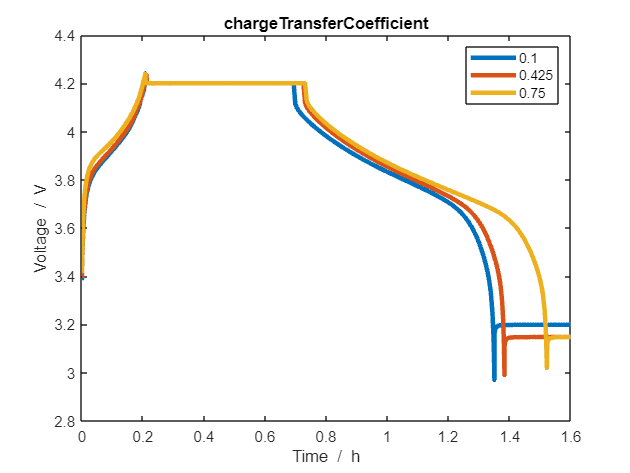

In [6]:
electrode_alpha="NegativeElectrode.";
crate_alpha=3;
kinetic_parameter_2_vals=[linspace(0.1,0.75,3)];
% kinetic_parameter_2_vals=0.5;
kinetic_parameter_2=strcat(electrode_alpha,"Coating.ActiveMaterial.Interface.chargeTransferCoefficient");
plot_voltage_cccv(kinetic_parameter_2_vals,kinetic_parameter_2,crate_alpha)

<a name="H_34D281BF"></a>

####  **Example 6.** Reaction rate constant at the surface of the active particles: Butler\-Volmer equation (exchange current density)

The reaction rate constant, $k_0$ determines the exchange current density, which in turn influences both the charging and discharging rates of an electrochemical cell. When the exchange current density is large, a high charge or discharge current can be achieved with only a small overpotential. As we increase the reaction rate constant, we observe a decrease in the cell overpotential for both the positive and negative electrodes, indicating more efficient electrochemical reactions and improved cell performance.



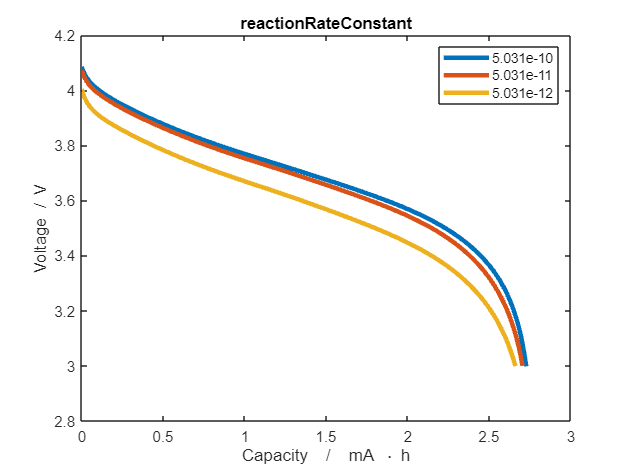


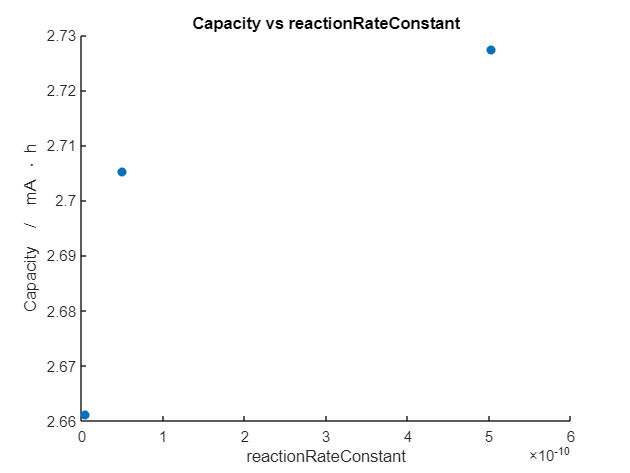

In [7]:
electrode_k="PositiveElectrode.";
crate_k=3;
kinetic_parameter_3=strcat(electrode_k,"Coating.ActiveMaterial.Interface.reactionRateConstant");
kinetic_parameter_3_vals=[5.031e-10,5.031e-11,5.031e-12];
plot_capacities(kinetic_parameter_3_vals,kinetic_parameter_3,crate_k)

<a name="H_70666AB5"></a>

### 5. Transport parameters

We now turn our attention to the parameters that describe mass transport within the electrolyte and the electrodes. In this analysis, we will keep the kinetic parameters fixed while varying the transport parameters.

<a name="H_B7317C64"></a>

#### Example 7. Reference diffusion coefficient (Solid diffusion)

We start with the paremeters that affect the diffusion coefficient within the electrodes. In BattMo, we can select from various diffusion models. For more details, please refer to the [documentation](https://battmoteam.github.io/BattMo/json.html#solid-diffusion). The input data for solid diffusion includes parameters such as particle radius, volumetric surface area, and the reference diffusion coefficient. The diffusion coefficient is calculated using an Arrhenius\-type equation, where the reference diffusion constant, $D_0$ represents the pre\-exponential factor. Increasing $D_0$  in one or both the electrodes aids in Li transport, reducing the overpotential at high current densities.



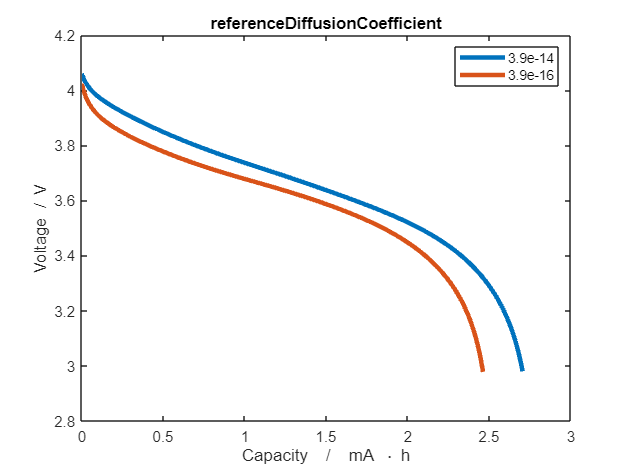


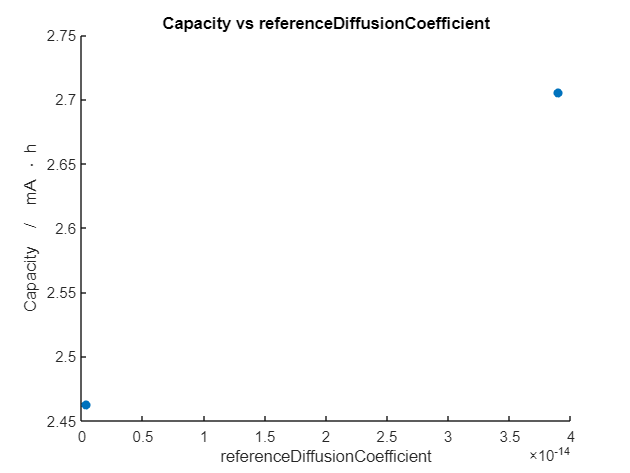

In [8]:
electrode_el_refdiff="PositiveElectrode.";
crate_el_refdiff=3;
transport_parameter_4=strcat(electrode_el_refdiff,"Coating.ActiveMaterial.SolidDiffusion.referenceDiffusionCoefficient");
transport_parameter_4_vals=[3.9e-14,3.9e-16];
plot_capacities(transport_parameter_4_vals,transport_parameter_4,crate_el_refdiff)

<a name="H_979A8274"></a>

####  **Example 8.** Active particle radius (Solid diffusion)

The active particle size $R_s$ plays a crucial role in diffusion within the solid material. A smaller active particle size allows for a faster diffusion or a shorter path for the Li ions as one would expect, this means faster charging and discharging, resulting in higher power density. However, this comes at the cost of lower energy density and potentially shorter cycling lifetimes. The increased surface area associated with smaller particles leads to more interactions with the electrolyte, which can accelerate degradation processes and negatively impact the long\-term stability of the battery.



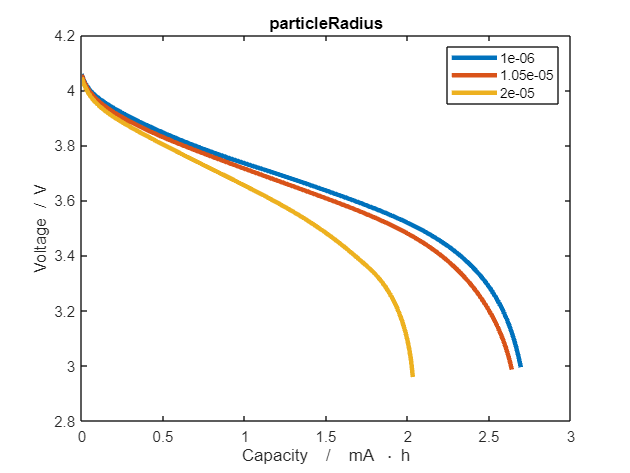


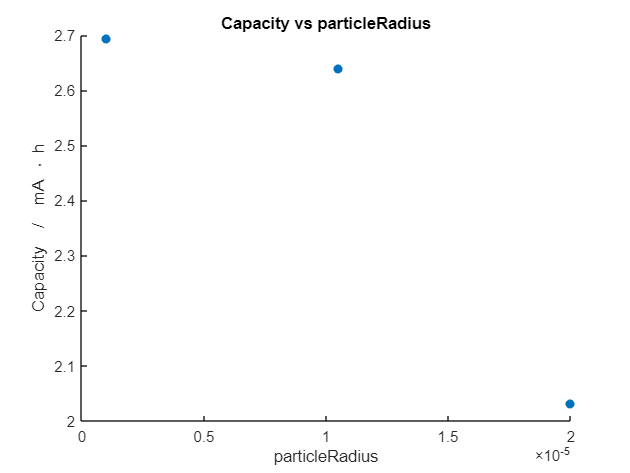

In [9]:
electrode_rad="NegativeElectrode.";
crate_radius=3;
transport_parameter_1=strcat(electrode_rad,"Coating.ActiveMaterial.SolidDiffusion.particleRadius");
transport_parameter_1_vals=[linspace(1,20,3)].*micro;
plot_capacities(transport_parameter_1_vals,transport_parameter_1,crate_radius)

<a name="H_CFE0B019"></a>

####  **Example 9.** Electronic conductivity of the active material in the electrodes (effective electronic conductivity)

Electronic conductivity $\sigma_s$ plays an important role in determining the potential of the electrodes. Increasing the electronic conductivity should result in a lower overpotential, as it reduces the ohmic resistances within the electrode. Typically, conducting additives are added to enhance this conductivity. However, in this scenario, we are specifically increasing the intrinsic conductivity of the electrodes themselves. This enhancement is expected to lower the overpotential further by reducing internal resistive losses, thereby improving the overall efficiency and performance of the cell.



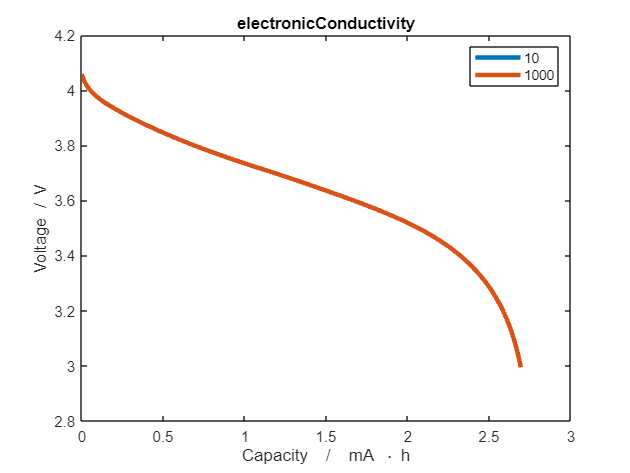


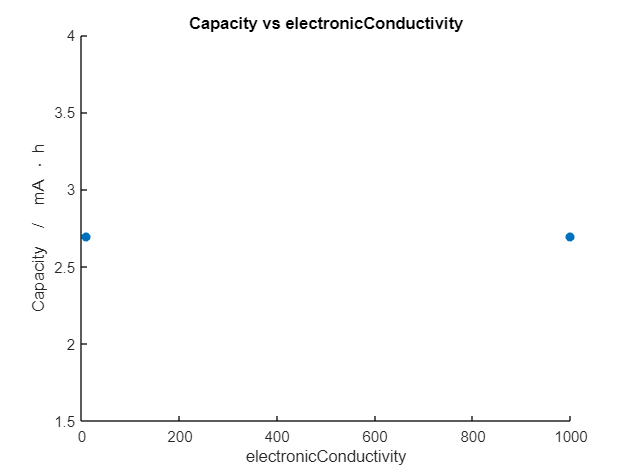

In [10]:
electrode_el_conductivity="PositiveElectrode.";
crate_el_conductivity=3;
transport_parameter_2=strcat(electrode_el_conductivity,"Coating.ActiveMaterial.electronicConductivity");%does not seem to affect the discharge profile
% transport_parameter_2_vals=10;
transport_parameter_2_vals=[linspace(10,1000,2)];
plot_capacities(transport_parameter_2_vals,transport_parameter_2,crate_el_conductivity)

<a name="H_A15E2881"></a>

 **Bruggeman Coefficient**


The Bruggemann coefficient determines the effective electronic conductivity within the electrodes, as well as the ionic conductivity and the effective diffusion coefficient within the electrolyte. This coefficient accounts for the tortuosity and porosity of the material, influencing how easily electrons and ions can move through the porous structure of the electrodes and the electrolyte. This coefficient is influenced by factors such as slurry preparation, drying, and coating processes, which affect the morphology and microstructure of the material. A higher Bruggemann coefficient indicates greater tortuosity, leading to increased difficulty in ion and electron transport, increasing the mass transport overpotential of the cell.

<a name="H_BE463382"></a>

####  **Example 10.** Bruggeman coefficient in the electrodes (effective electronic conductivity)


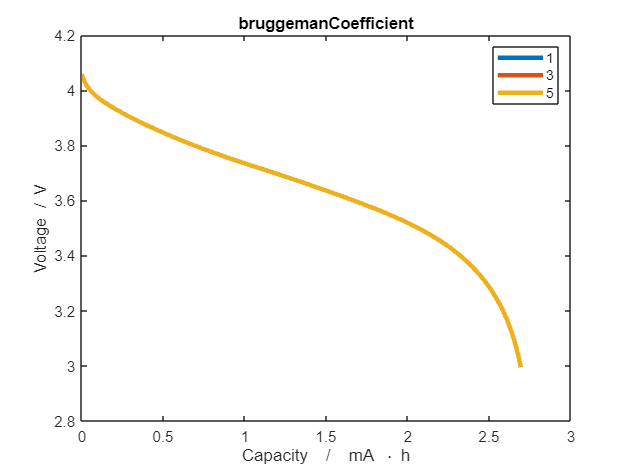


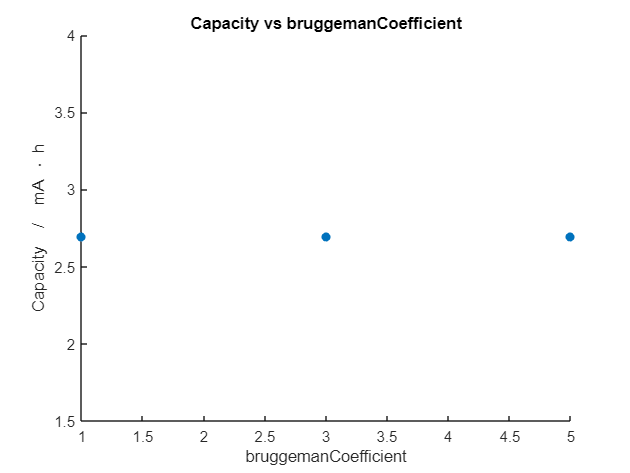

In [11]:
electrode_brug="PositiveElectrode.";
electrode_crate_brug=3;
transport_parameter_4=strcat(electrode_brug,"Coating.bruggemanCoefficient");% does not seem to affect the discharge profile
transport_parameter_4_vals=[linspace(1.0,5,3)];
plot_capacities(transport_parameter_4_vals,transport_parameter_4,electrode_crate_brug)

<a name="H_650E4330"></a>

#### Example 11. Bruggeman coefficient in the electrolyte (effective ionic conductivity)

Next we turn to the Bruggemen coefficient for the electrolyte, We observe that as the Bruggemann coefficient $p_{elyte}$ increases from 1 to 2, the overpotential rises steeply, accompanied by a loss in capacity as this leads to a more 'tortuous' transport within the electrolyte  .



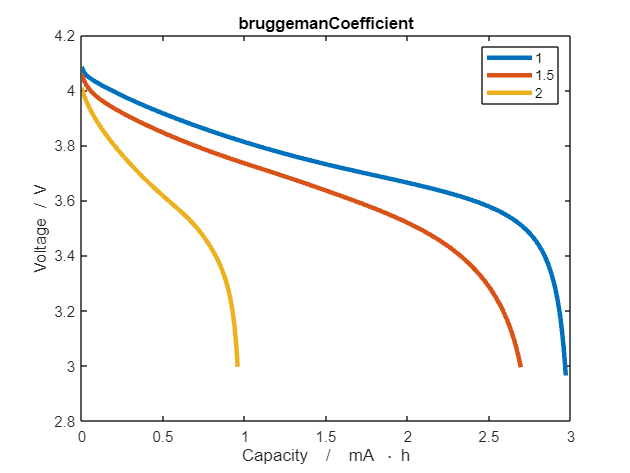


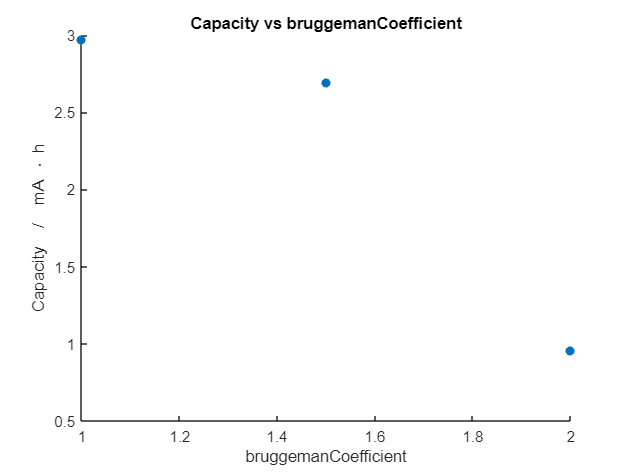

In [12]:
elyte_crate_brug=3;
transport_parameter_5="Electrolyte.bruggemanCoefficient";
transport_parameter_5_vals=[linspace(1.0,2,3)];
plot_capacities(transport_parameter_5_vals,transport_parameter_5,elyte_crate_brug)

<a name="H_88E10BE5"></a>

#### **Example 12. Initial e**lectrolyte concentration (electrolyte diffusion)

The diffusion coefficient of the electrolyte is determined by fitting curves to mass transport experiments in the electrolyte \[6\], and it varies with the concentration of Li ions and temperature. Increasing the initial ion concentration in the electrolyte generally raises the diffusion coefficient, enhancing ion transport and improving cell performance. However, beyond a certain concentration, the capacity starts to decline. For example, at 1500 mol/m^3 (1mol/L), the discharge capacity is actually lower than at 1000 mol/m^3(1.5mol/L), indicating that the optimal concentration is 1 mol/litre. This is because the ionic conductivity of the electrolyte, which depends on Li concentration and temperature, begins to decrease when the electrolyte becomes too concentrated. As a result, resistance increases, reducing the efficiency of ion transport and ultimately lowering overall capacity. \[5\].



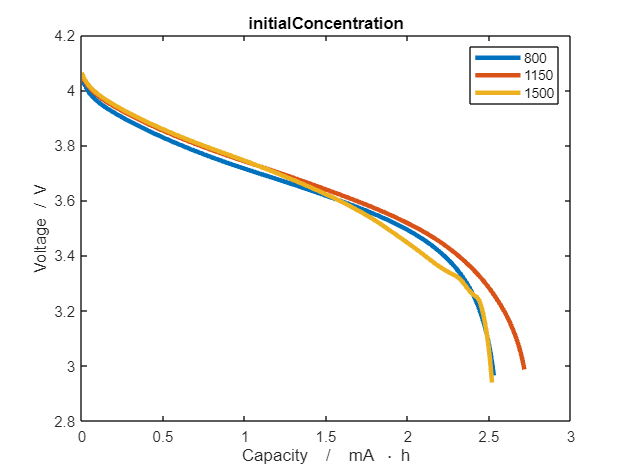


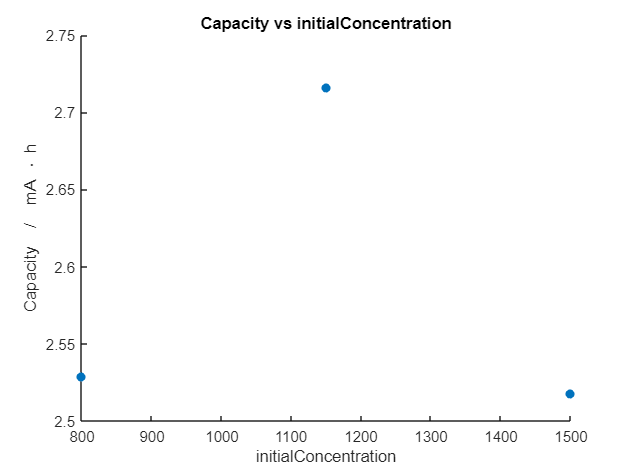

In [13]:
crate_elyte=3;
transport_parameter_3_vals=[linspace(0.8e03,1.5e03,3)];
transport_parameter_3="Electrolyte.initialConcentration";
plot_capacities(transport_parameter_3_vals,transport_parameter_3,crate_elyte)

<a name="H_310E1F47"></a>

####  **Example 13.** Transference number (electrolyte diffusion)

The transference number $t_+$ of an ion is defined as the fraction of the total current carried by that specific species in the electrolyte. When we increase the fraction of current carried by $Li^+$ ions in the electrolyte, equation (3), rather than by the counter ion $PF_6^-$ , we can expect to observe a lower overpotential and a higher capacity. This is because the more efficiently the ions are transported to the electrode, the less overpotential is required to drive the electrochemical reaction, as we observe below. However, as with many parameters, increasing it beyond a certain point does not lead to further significant improvements in capacity.



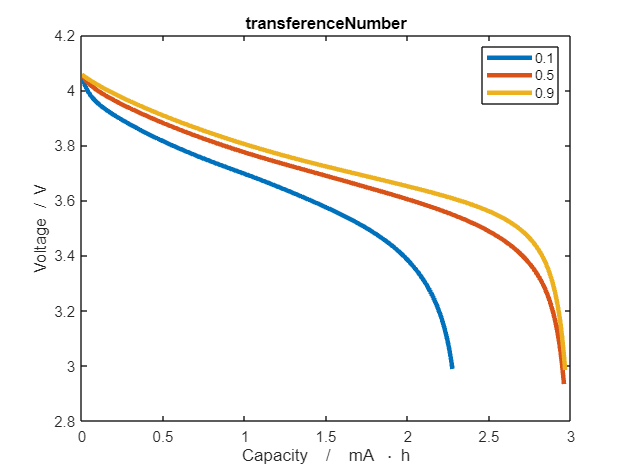


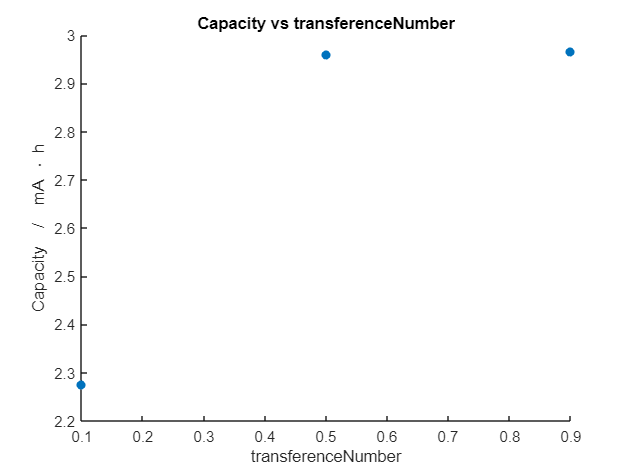

In [14]:
crate_t=3;
kinetic_parameter_5="Electrolyte.species.transferenceNumber";
kinetic_parameter_5_vals=[linspace(0.1,0.9,3)];
plot_capacities(kinetic_parameter_5_vals,kinetic_parameter_5,crate_t)

<a name="H_BBCD099A"></a>

### **6. Summary**

In this guide, we studied the OCV curve and the various loss factors, including thermodynamic, kinetic, and transport losses, that influence a cell at different cycling rates using BattMo. We simulated each of these losses by performing parameter sweeps of the material properties to understand their effects on cell performance.


In the next tutorial, we will examine the rate capability of a cell and compute key performance characteristics, such as specific energy and energy density, which are crucial for optimizing cell design.

<a name="H_528AFB35"></a>

### **7. References**

\[1\][ L. Xia, E. Najafi, Z. Li, H.J. Bergveld, M.C.F. Donkers, "A computationally efficient implementation of a full and reduced\-order electrochemistry\-based model for Li\-ion batteries," *Applied Energy*, vol. 208, pp. 1285\-1296, 2017, ISSN 0306\-2619](https://www.sciencedirect.com/science/article/pii/S0306261917313090.), [](https://doi.org/10.1016/j.apenergy.2017.09.025.)


\[2\] [Bharatkumar Suthar, Paul W. C. Northrop, Derek Rife, and Venkat R. Subramanian, "Effect of Porosity, Thickness and Tortuosity on Capacity Fade of Anode," *Journal of The Electrochemical Society*, vol. 162, no. 9, p. A1708, 2015. DOI: 10.1149/2.0061509jes. ](https://iopscience.iop.org/article/10.1149/2.0061509jes)


\[3\] [Venkat Srinivasan and John Newman, "Discharge Model for the Lithium Iron\-Phosphate Electrode," \*Journal of The Electrochemical Society\*, vol. 151, no. 10, p. A1517, 2004. DOI: 10.1149/1.1785012](https://iopscience.iop.org/article/10.1149/1.1785012/meta).


\[4\]  [F Brosa Planella *et al* 2022 *Prog. Energy* 4 042003](https://iopscience.iop.org/article/10.1088/2516-1083/ac7d31/meta)


\[5\] [Sunwook Hwang, Dong\-Hui Kim, Jeong Hee Shin, Jae Eun Jang, Kyoung Ho Ahn, Chulhaeng Lee, and Hochun Lee,*The Journal of Physical Chemistry C* **2018** *122* (34), 19438\-19446, DOI: 10.1021/acs.jpcc.8b06035](https://pubs.acs.org/doi/10.1021/acs.jpcc.8b06035)


\[6\] [Nyman, A., Behm, M., & Lindbergh, G. (2008). Electrochemical characterisation and modelling of the mass transport phenomena in LiPF6–EC–EMC electrolyte. *Electrochimica Acta, 53*(22), 6356\-6365. https://doi.org/10.1016/j.electacta.2008.04.023](https://www.sciencedirect.com/science/article/pii/S0013468608005045)



In [15]:
function plot_capacities(parameterArray1,input_parameter1,CRate)
    % Function to take in the specific input parameter along with its
    % values and c-rate and plot the capacities
    %
    % Parameters:
    % parameterArray - a numeric vector
    % input_parameter - a string specifying the operation ('sum', 'mean', 'scale')
    % crate - a numeric value used for scaling (only for 'scale' operation)
    %
    % Returns:
    % None
    % instantiate an empty figure
    capacity_array = [];
    output = cell(size(parameterArray1));
    figure()
    jsonstruct = parseBattmoJson('Examples/JsonDataFiles/sample_input.json'); % load default input
    if nargin == 3
        jsonstruct.Control.DRate = CRate;
    end
    output = cell(size(parameterArray1));
    markers={'-',"-",'-','-','-','-','-','v','d','^','s','>','<'};
    for i = 1:numel(parameterArray1)
        c1 = split(input_parameter1,'.');
        jsonstruct = setfield(jsonstruct,c1{:},parameterArray1(i));
        jsonstruct.TimeStepping.totalTime = (1./jsonstruct.Control.DRate) .* 3600 .* 1.1;
        % run the simulation and store the results in the output cell array
        % output{i} = runBatteryJson(jsonstruct);
        [results,output{i}] = evalc('runBatteryJson(jsonstruct)');
         % retrieve the states from the simulation result
        states = output{i}.states;
        %plotDashboard(output{i}.model, output{i}.states, 'step', 40);
        % extract the time and voltage quantities
        time = cellfun(@(state) state.time, states);
        voltage = cellfun(@(state) state.('Control').E, states);
        current = cellfun(@(state) state.('Control').I, states);
        % calculate the capacity
        capacity = time .* current;
        final_capacity=capacity(find(capacity, 1, 'last'))/(hour*milli);
        capacity_array(i)=final_capacity;
        % plot capacity vs voltage
        plot((capacity/(hour*milli)), voltage, markers{i}, 'linewidth', 3);
        xlabel('Capacity  /  mA \cdot h')
        ylabel('Voltage  /  V')
        hold on
        L{i} = strcat(num2str(parameterArray1(i)));
        legend(L);
        title(c1{end})
    end
    figure;
    scatter(parameterArray1,capacity_array,"filled")
    ylabel('Capacity  /  mA \cdot h')
    xlabel(c1{end})
    title(strcat("Capacity vs ",c1{end}));
end

function plot_voltage_cccv(parameterArray1,input_parameter1,CRate)
    % Function to take in the specific input parameter along with its
    % values and c-rate and plot the capacities
    %
    % Parameters:
    % parameterArray - a numeric vector
    % input_parameter - a string specifying the operation ('sum', 'mean', 'scale')
    % crate - a numeric value used for scaling (only for 'scale' operation)
    %
    % Returns:
    % None
    % instantiate an empty figure
    fig1=figure();
    output = cell(size(parameterArray1));
    jsonstruct = parseBattmoJson('Examples/JsonDataFiles/sample_input.json'); % load default input
    cccv_control_protocol = parseBattmoJson('cccv_control_charge_02.json');%loads the CCCV protocol
    jsonstruct_modified = mergeJsonStructs({cccv_control_protocol, jsonstruct});
    jsonstruct_modified.Control.CRate = CRate;
    output = cell(size(parameterArray1));
    markers= {'-',"-",'-','-','-','-','-','v','d','^','s','>','<'};
    for i = 1:numel(parameterArray1)
        c1 = split(input_parameter1,'.');
        jsonstruct_modified = setfield(jsonstruct_modified,c1{:},parameterArray1(i));
        jsonstruct_modified.TimeStepping.totalTime = (1./jsonstruct_modified.Control.CRate) .* 3600 .* 1.1*jsonstruct_modified.Control.numberOfCycles*2;
        % run the simulation and store the results in the output cell array
        [results,output{i}] = evalc('runBatteryJson(jsonstruct_modified)');
         % retrieve the states from the simulation result
        states = output{i}.states;
        % extract the time and voltage quantities
        time = cellfun(@(state) state.time, states);
        voltage = cellfun(@(state) state.('Control').E, states);
        current = cellfun(@(state) state.('Control').I, states);

        % calculate the capacity
        capacity = time .* current;
       figure(fig1);
        plot((time/hour), voltage, '-', 'linewidth', 3)
        hold on
        % figure(fig2)
        % plot((time/hour), current, '-', 'linewidth', 3)
        %hold on
        L{i} = strcat(num2str(parameterArray1(i)));
        legend(L);
        title(c1{end})
    end
    hold off
   xlabel('Time  /  h')
  ylabel('Voltage  /  V')
end

